In [1]:
import warnings;warnings.simplefilter('ignore')
import os
os.listdir()

['second_model.ipynb',
 'train.csv',
 'DataCleaning.ipynb',
 'EDA.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'xgboost.ipynb',
 'LSTM.ipynb',
 'train_FeatureSelected.csv',
 'feature select.ipynb',
 'tpot_pa_pipeline.py',
 'TPOT.ipynb',
 'three_model.ipynb',
 'cnn-time-stack.ipynb',
 '.ipynb_checkpoints']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from  tqdm import tqdm_notebook as tqdm
from sklearn.utils import shuffle

# load raw data

In [3]:
df = pd.read_excel("PA_201605-2012001更新R6(20190509).xlsx",index_col = 0,parse_dates = True)
print(df.shape)
df.tail()

(193825, 93)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD
2020-01-14 23:20:00,308.011,308.855,307,308,307,307,307.155,305.605,303.322,301,...,0,4.75646879756469E-06*193821,4.05932,4.053850,3.28494,1407,1405.103894,-0.550185,0.429594,0.006
2020-01-14 23:30:00,307.994,308,306.405,308,306.822,306.105,306.255,305,302.822,300.172,...,0,4.75646879756469E-06*193822,4.06726,4.061772,2.67178,1411.79,1409.883474,-0.899908,0.757286,0.006
2020-01-14 23:40:00,307.011,307.994,306,307.272,306,305.355,305.905,304.155,302,300,...,0,4.75646879756469E-06*193823,4.06527,4.059790,2.83228,1406.83,1404.931948,-0.455118,0.920603,0.006
2020-01-14 23:50:00,307,307.011,305.805,306.971,305.472,304.955,305,303.955,301.971,299.622,...,0,4.75646879756469E-06*193824,4.06097,4.055500,2.98571,1407.55,1405.652984,-0.399457,0.850938,0.006
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006


In [4]:
print(df['DATA OF USE'].head(3))

2016-05-09 00:00:00    4.75646879756469E-06*1
2016-05-09 00:10:00    4.75646879756469E-06*2
2016-05-09 00:20:00    4.75646879756469E-06*3
Name: DATA OF USE, dtype: object


In [5]:
print(df['DATA OF USE'].tail(3))

2020-01-14 23:40:00    4.75646879756469E-06*193823
2020-01-14 23:50:00    4.75646879756469E-06*193824
NaT                                            NaN
Name: DATA OF USE, dtype: object


In [6]:
df['DATA OF USE'].isnull().sum()

1

In [7]:
df.iloc[[-1]]

,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006


In [8]:
print(df.shape)
df = df.iloc[:-1,:]
print(df.shape)

(193825, 93)
(193824, 93)


# HANDLE DATA OF USE COL

In [9]:
df['DATA OF USE'] = df['DATA OF USE'].apply(lambda x:str(x).split('*')[1])

In [10]:
df[['DATA OF USE']].head()

,DATA OF USE
2016-05-09 00:00:00,1
2016-05-09 00:10:00,2
2016-05-09 00:20:00,3
2016-05-09 00:30:00,4
2016-05-09 00:40:00,5


In [11]:
df[['DATA OF USE']].tail()

,DATA OF USE
2020-01-14 23:10:00,193820
2020-01-14 23:20:00,193821
2020-01-14 23:30:00,193822
2020-01-14 23:40:00,193823
2020-01-14 23:50:00,193824


# to_numeric

In [12]:
df = df.replace("[-11059] No Good Data For Calculation",np.nan)

In [13]:
df = df.replace("Scan Off",np.nan)

In [14]:
for col in tqdm(df.columns):
    df[col] = pd.to_numeric(df[col])
print(df.dtypes)


MLPAP_TI-0706B02         float64
MLPAP_TI-0706B03         float64
MLPAP_TI-0706B04         float64
MLPAP_TI-0706B05         float64
MLPAP_TI-0706B06         float64
                          ...   
MLPAP_FI-V211.PV         float64
MLPAP_FI-V211.PV(轉換後)    float64
MLPAP_PI-0658.PV         float64
MLPAP_TIC-0757.PV        float64
MLPAP_V125-PHD           float64
Length: 93, dtype: object


# Missing Data

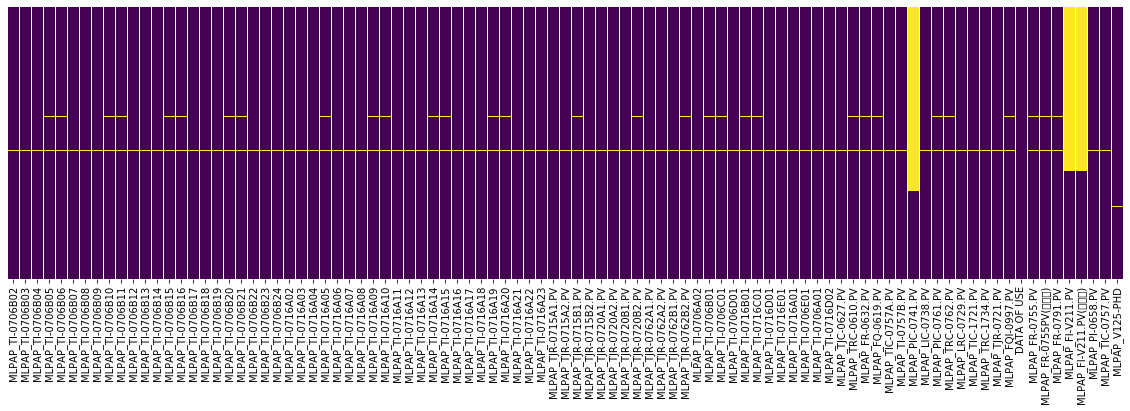

In [15]:
fig = plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
print('三個欄位有嚴重缺值情況:')
df.isnull().sum().sort_values(ascending=False).head(3)

三個欄位有嚴重缺值情況:


MLPAP_PIC-0741.PV        131754
MLPAP_FI-V211.PV(轉換後)    117661
MLPAP_FI-V211.PV         117661
dtype: int64

# describe

In [17]:
df[['MLPAP_FI-V211.PV','MLPAP_FI-V211.PV(轉換後)','MLPAP_PIC-0741.PV']].describe()

,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PIC-0741.PV
count,76163.000000,76163.000000,62070.000000
mean,2891.429681,2887.531708,15.116182
std,2993.745208,2989.709302,13.884606
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.100000
50%,1437.000000,1435.062762,23.185018
75%,6579.463056,6570.593199,28.000000
max,7356.329160,7346.411999,49.435625


# boxplot

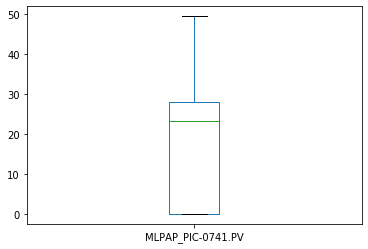

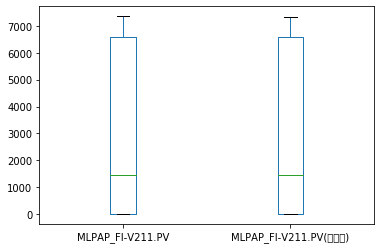

In [18]:
df[['MLPAP_PIC-0741.PV']].plot(kind='box')
plt.show()

df[['MLPAP_FI-V211.PV','MLPAP_FI-V211.PV(轉換後)']].plot(kind='box')
plt.show()

# correlation(證明補值必要性)

In [19]:
col = ['MLPAP_PIC-0741.PV','MLPAP_FI-V211.PV','MLPAP_FI-V211.PV(轉換後)','MLPAP_FQ-0619.PV','MLPAP_FQI-0997.PV']
df[col].corr().style.background_gradient()

,MLPAP_PIC-0741.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_FQ-0619.PV,MLPAP_FQI-0997.PV
MLPAP_PIC-0741.PV,1,0.897309,0.897309,0.84405,0.837644
MLPAP_FI-V211.PV,0.897309,1,1,0.648519,0.636417
MLPAP_FI-V211.PV(轉換後),0.897309,1,1,0.648519,0.636417
MLPAP_FQ-0619.PV,0.84405,0.648519,0.648519,1,0.992673
MLPAP_FQI-0997.PV,0.837644,0.636417,0.636417,0.992673,1


# KNN 實驗

In [20]:
df.corr()['MLPAP_PIC-0741.PV'].sort_values(ascending=False)

MLPAP_PIC-0741.PV      1.000000
MLPAP_TJR-0721.PV      0.907504
MLPAP_TIC-0757A.PV     0.904367
MLPAP_TI-0716A06       0.899273
MLPAP_TI-0716C01       0.899050
                         ...   
MLPAP_TIC-0757.PV     -0.010029
MLPAP_V125-PHD        -0.027146
DATA OF USE           -0.035826
MLPAP_TI-0706B01      -0.084016
MLPAP_TJR-0762A1.PV         NaN
Name: MLPAP_PIC-0741.PV, Length: 93, dtype: float64

In [30]:
c1 = df['MLPAP_PIC-0741.PV'].isnull()
c2 = df['MLPAP_PIC-0741.PV'].notnull()
subset_1 = df.loc[c1,['MLPAP_PIC-0741.PV','MLPAP_TJR-0721.PV','MLPAP_TIC-0757A.PV']].sample(10)
subset_2 = df.loc[c2,['MLPAP_PIC-0741.PV','MLPAP_TJR-0721.PV','MLPAP_TIC-0757A.PV']].sample(90)
subset = subset_1.append(subset_2)
subset = shuffle(subset)
subset = subset.apply(lambda x:round(x,2))
subset.head()

,MLPAP_PIC-0741.PV,MLPAP_TJR-0721.PV,MLPAP_TIC-0757A.PV
2019-02-03 02:40:00,28.8,350.29,348.78
2019-08-10 20:40:00,0.2,71.80,52.00
2017-04-04 23:50:00,NaN,346.90,346.14
2019-03-13 13:50:00,0.4,105.56,121.97
2019-12-19 01:10:00,28.0,354.60,354.04


In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
subset[:] = sc.fit_transform(subset[:])
subset = subset.apply(lambda x:round(x,4))
subset.head()

,MLPAP_PIC-0741.PV,MLPAP_TJR-0721.PV,MLPAP_TIC-0757A.PV
2019-02-03 02:40:00,1.0867,0.9358,0.8885
2019-08-10 20:40:00,-1.0398,-0.9965,-1.1110
2017-04-04 23:50:00,NaN,0.9123,0.8707
2019-03-13 13:50:00,-1.0249,-0.7623,-0.6396
2019-12-19 01:10:00,1.0272,0.9657,0.9239


In [32]:
subset.isnull().sum()

MLPAP_PIC-0741.PV     10
MLPAP_TJR-0721.PV      0
MLPAP_TIC-0757A.PV     0
dtype: int64

In [33]:
import plotly.express as px

fig = px.scatter(subset.head(5), x="MLPAP_TJR-0721.PV",y="MLPAP_TIC-0757A.PV", color="MLPAP_PIC-0741.PV")
fig.show()

In [34]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)
subset[:] = imputer.fit_transform(subset[:])

In [35]:
fig = px.scatter(subset.head(5), x="MLPAP_TJR-0721.PV",y="MLPAP_TIC-0757A.PV", color="MLPAP_PIC-0741.PV")
fig.show()

In [36]:
subset.head()

,MLPAP_PIC-0741.PV,MLPAP_TJR-0721.PV,MLPAP_TIC-0757A.PV
2019-02-03 02:40:00,1.0867,0.9358,0.8885
2019-08-10 20:40:00,-1.0398,-0.9965,-1.1110
2017-04-04 23:50:00,1.0867,0.9123,0.8707
2019-03-13 13:50:00,-1.0249,-0.7623,-0.6396
2019-12-19 01:10:00,1.0272,0.9657,0.9239


In [37]:
subset[:] = sc.inverse_transform(subset[:])
subset.head()

,MLPAP_PIC-0741.PV,MLPAP_TJR-0721.PV,MLPAP_TIC-0757A.PV
2019-02-03 02:40:00,28.800642,350.289991,348.779986
2019-08-10 20:40:00,0.199490,71.804861,52.006958
2017-04-04 23:50:00,28.800642,346.903146,346.138046
2019-03-13 13:50:00,0.399893,105.558014,121.973853
2019-12-19 01:10:00,28.000375,354.599210,354.034182


# KNN fill miss value

In [38]:
sc = StandardScaler()
df[:] = sc.fit_transform(df[:])
df = df.apply(lambda x:round(x,4))
df.head()

,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD
2016-05-09 00:00:00,0.6726,0.5369,0.4899,0.4596,0.4880,0.4883,0.4930,0.5235,0.5408,0.5758,...,-1.7343,-1.732,-1.3200,-1.3200,-1.4398,NaN,NaN,-1.7520,-0.0304,0.0337
2016-05-09 00:10:00,0.6726,0.5367,0.4916,0.4596,0.4868,0.4883,0.4947,0.5235,0.5408,0.5758,...,-1.7343,-1.732,-1.3016,-1.3016,-1.4427,NaN,NaN,-1.7520,-0.0307,0.0337
2016-05-09 00:20:00,0.6726,0.5364,0.4911,0.4584,0.4868,0.4883,0.4934,0.5235,0.5408,0.5758,...,-1.7343,-1.732,-1.2930,-1.2930,-1.4435,NaN,NaN,-1.7515,-0.0300,0.0337
2016-05-09 00:30:00,0.6726,0.5368,0.4911,0.4601,0.4868,0.4883,0.4938,0.5235,0.5408,0.5758,...,-1.7343,-1.732,-1.3026,-1.3026,-1.4415,NaN,NaN,-1.7496,-0.0304,0.0337
2016-05-09 00:40:00,0.6726,0.5372,0.4907,0.4590,0.4868,0.4883,0.4961,0.5235,0.5408,0.5758,...,-1.7343,-1.732,-1.3259,-1.3259,-1.4456,NaN,NaN,-1.7519,-0.0299,0.0337


In [39]:
from sklearn.impute import KNNImputer

df = shuffle(df)
step = 10000

# fill loop
for i in tqdm(range(0, len(df), step)):
    start, end = i, min(i+step,len(df))
    imputer = KNNImputer(n_neighbors = 3)
    df.iloc[start:end] = imputer.fit_transform(df.iloc[start:end])

df = df.sort_index()

In [40]:
df[:] = sc.inverse_transform(df[:])
print(df.shape)
df.head()

(193824, 93)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD
2016-05-09 00:00:00,399.996956,401.962157,400.757148,402.245915,401.143639,400.998932,400.048649,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.050917,4.045456,6.484379,0.089541,0.08942,-1.007740,1.635430,0.050999
2016-05-09 00:10:00,399.996956,401.939352,400.954632,402.245915,401.004025,400.998932,400.244686,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.157893,4.152288,6.449854,0.089541,0.08942,-1.007740,1.624784,0.050999
2016-05-09 00:20:00,399.996956,401.905143,400.896549,402.104563,401.004025,400.998932,400.094776,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.207893,4.202220,6.440330,0.089541,0.08942,-0.905851,1.649624,0.050999
2016-05-09 00:30:00,399.996956,401.950754,400.896549,402.304812,401.004025,400.998932,400.140902,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.152079,4.146482,6.464140,0.089541,0.08942,-0.518671,1.635430,0.050999
2016-05-09 00:40:00,399.996956,401.996366,400.850082,402.175239,401.004025,400.998932,400.406128,402.996307,402.001481,400.999089,...,-0.026063,3.342795,4.016615,4.011200,6.415329,0.089541,0.08942,-0.987362,1.653172,0.050999


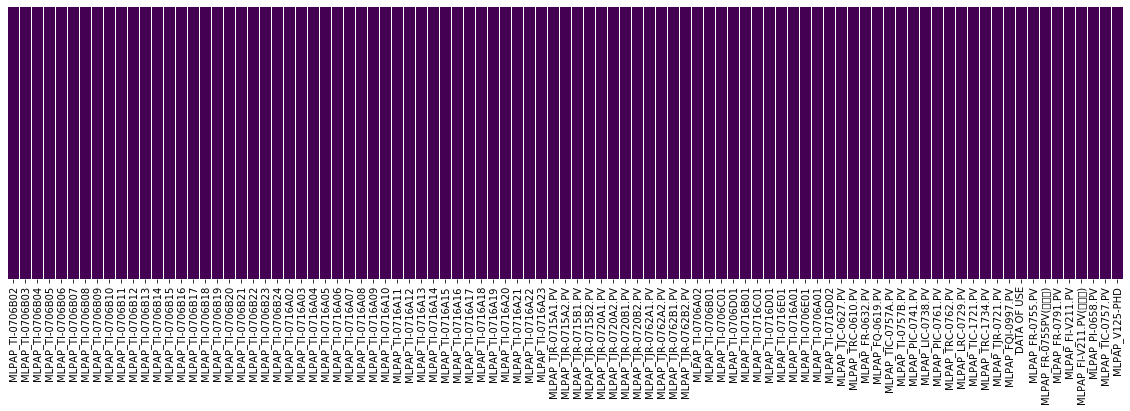

In [41]:
fig = plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
df[['MLPAP_FI-V211.PV','MLPAP_FI-V211.PV(轉換後)','MLPAP_PIC-0741.PV']].describe()

,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PIC-0741.PV
count,193824.000000,193824.000000,193824.000000
mean,1220.370288,1218.725092,5.703086
std,2372.551330,2369.352863,10.930269
min,0.089541,0.089420,0.000133
25%,0.089541,0.089420,0.000133
50%,0.089541,0.089420,0.000133
75%,1428.096630,1426.171395,0.300038
max,7356.271973,7346.354890,49.435876


# save

In [44]:
df.to_csv('./train.csv')
print('save done!')

save done!
